In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
fitur = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[fitur].copy()


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


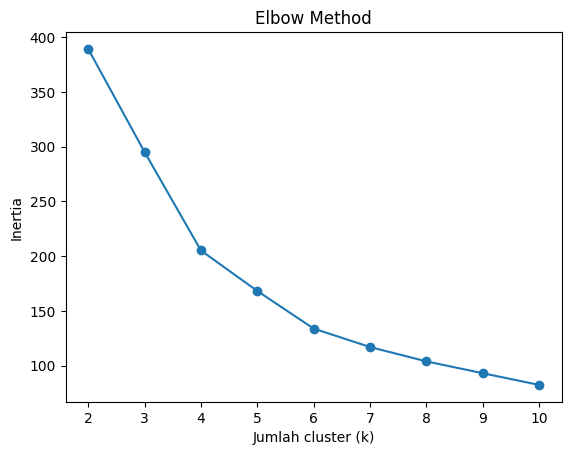

In [6]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(list(K_range), inertias, marker="o")
plt.xlabel("Jumlah cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


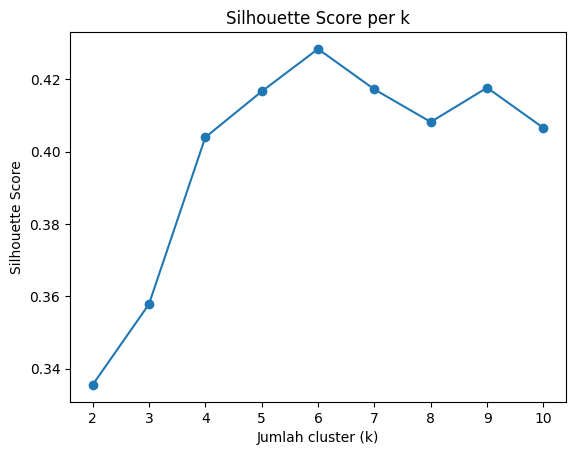

Best k by silhouette: 6


In [7]:
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure()
plt.plot(list(K_range), sil_scores, marker="o")
plt.xlabel("Jumlah cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score per k")
plt.show()

best_k = list(K_range)[int(np.argmax(sil_scores))]
print("Best k by silhouette:", best_k)


In [9]:
k_final = 6  # ganti sesuai hasil kamu
kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

df[["cluster"]].head()


,cluster
0,4
1,4
2,5
3,4
4,5


In [10]:
df["cluster"].value_counts().sort_index()


,count
cluster,
0,45
1,39
2,33
3,39
4,23
5,21


In [11]:
df.groupby("cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()


,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,56.333333,54.266667,49.066667
1,26.794872,57.102564,48.128205
2,41.939394,88.939394,16.969697
3,32.692308,86.538462,82.128205
4,25.000000,25.260870,77.608696
5,45.523810,26.285714,19.380952


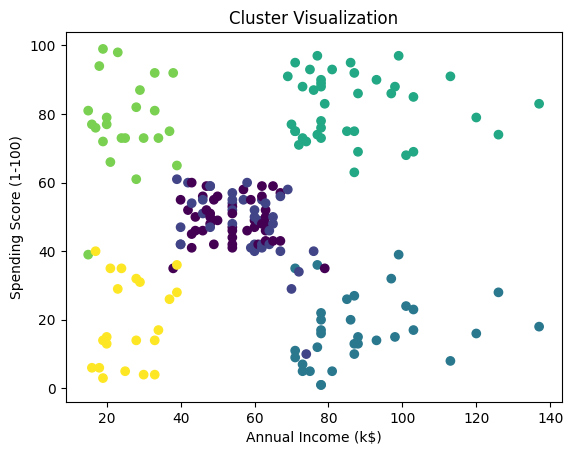

In [12]:
plt.figure()
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["cluster"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Cluster Visualization")
plt.show()


In [13]:
X_reg = df[["Age", "Annual Income (k$)", "cluster"]]
y_reg = df["Spending Score (1-100)"]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)


In [15]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


In [16]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2:", r2)
print("MSE:", mse)


R2: 0.021395331819681562
MSE: 482.68696653326026


In [17]:
print("Intercept:", reg.intercept_)
for nama, coef in zip(X_reg.columns, reg.coef_):
    print(nama, ":", coef)


Intercept: 72.78414582981478
Age : -0.6012650296656131
Annual Income (k$) : 0.04836022391338482
cluster : -0.2512611253189321
